# Task Summary
Knock airport Weather
Create a notebook called assignment_6_Weather.ipynb

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:
- The temperature
- The mean temperature each day
- The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)

You do not need to over comment your code. Marks will be given for how nice the plots are.

/tmp/ipykernel_13018/3125191380.py:13: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_stats = pd.read_csv(weather_url, skiprows = 23) # I opened the CSV file as it was not loading in and noticed a bunch of rows with notes, so I skipped these to get it read in
/tmp/ipykernel_13018/3125191380.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_stats['date'] = pd.to_datetime(weather_stats['date'])


<Axes: title={'center': 'Plot - Air Temperature (°C) over time '}, xlabel='Date', ylabel='Air Temperature (°C)'>

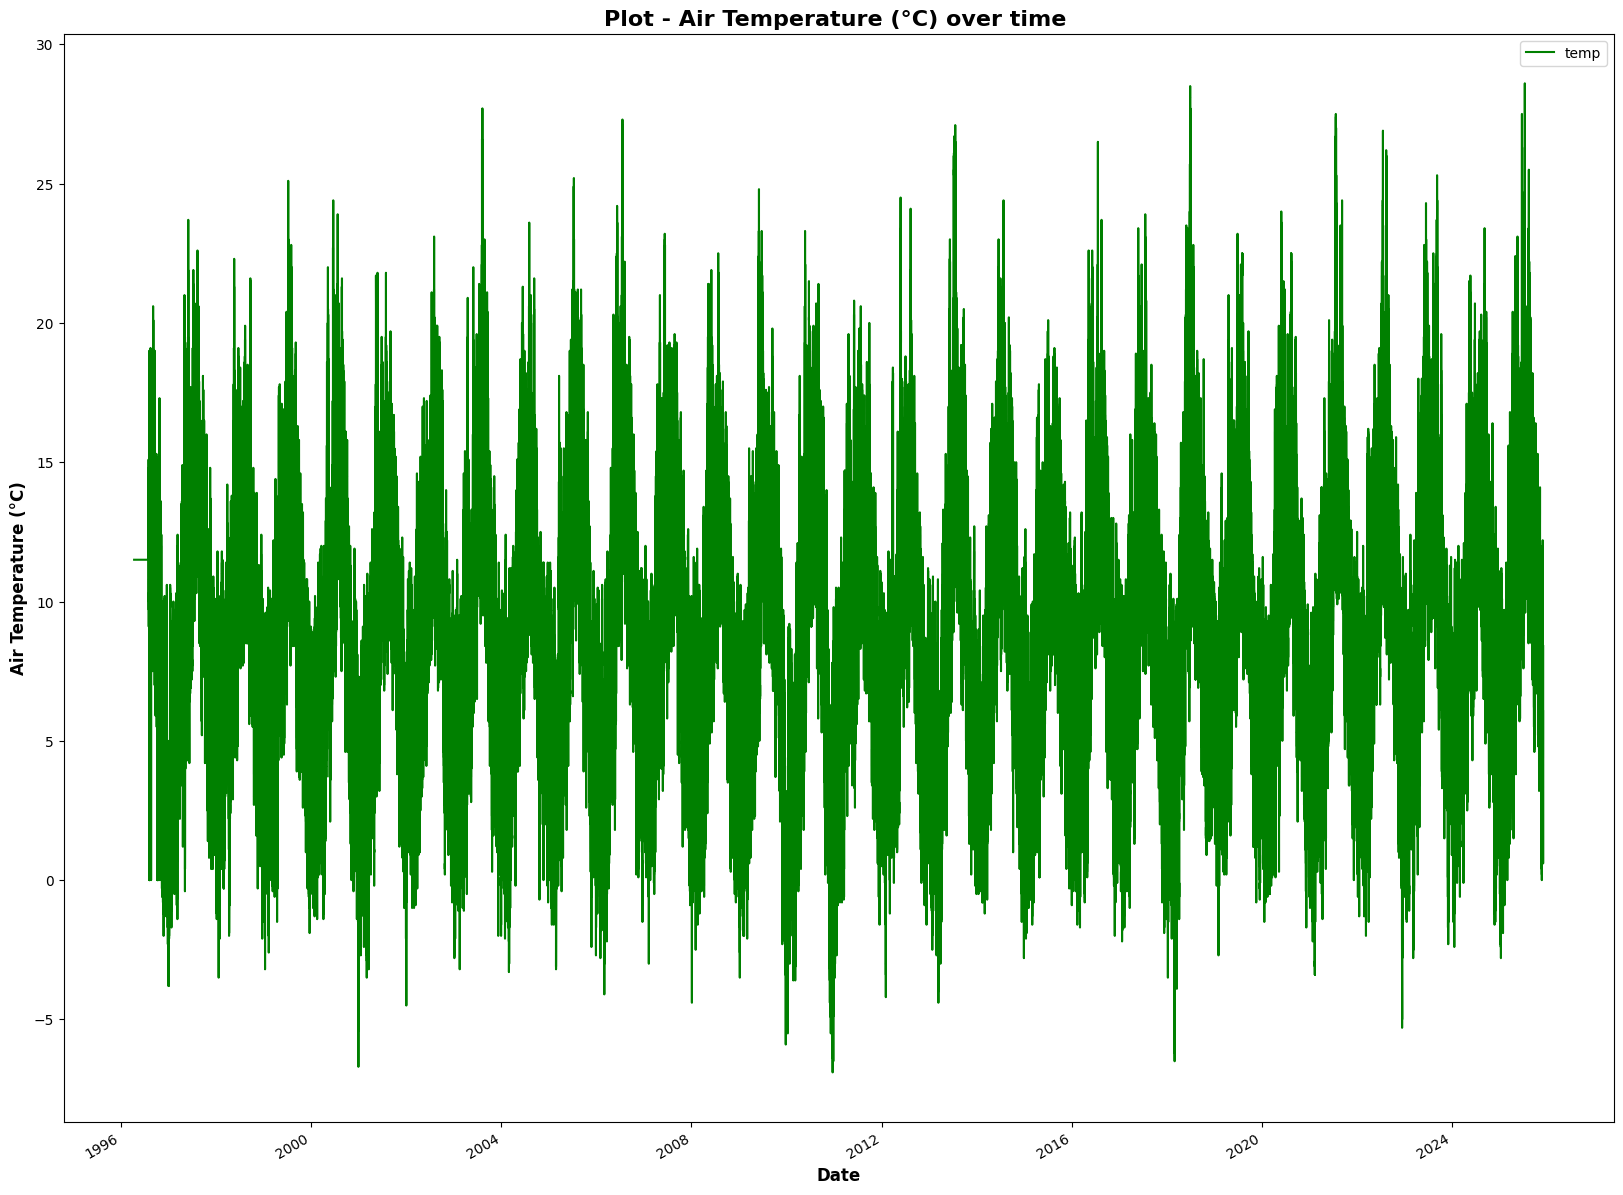

In [49]:
# PLOT 1 - Temperature over time
# Import pandas that I can work with the data in a dataframe format
import pandas as pd

# Import matplotlib & seaborn for using plots
import matplotlib as plt
import seaborn as sns

# use the url provided 
weather_url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

# Convert the CSV data into a pandas dataframe
weather_stats = pd.read_csv(weather_url, skiprows = 23) # I opened the CSV file as it was not loading in and noticed a bunch of rows with notes, so I skipped these to get it read in

# Note there is a date column that has time series information. As per the lecture videos, I need to convert this to datetime format. 
weather_stats['date'] = pd.to_datetime(weather_stats['date'])

#display(weather_stats)
# Make variable to store temperature and date data only as file is big and slow to pull into plot with all columns
temp_stats = weather_stats[['date','temp']]

# Now I want to make a continuous line plot of the temperature data contained in the csv over time. 
temp_lineplot = temp_stats.plot.line(x = 'date', y = 'temp', figsize = (20,16), color = 'green') # use pandas plot. I could have used either seaborn or matplotlib too
temp_lineplot.set_title('Plot - Air Temperature (°C) over time ', fontsize=16, weight='bold') # specify a title
temp_lineplot.set_ylabel('Air Temperature (°C)', fontsize=12, weight='bold') # set name of y axis and bold text
temp_lineplot.set_xlabel('Date', fontsize=12, weight='bold') # set name of x axis and bold text

display(temp_lineplot)



<Axes: title={'center': 'Plot - Daily Mean Air Temperature (°C) over time'}, xlabel='Date', ylabel='Daily Mean Air Temperature (°C)'>

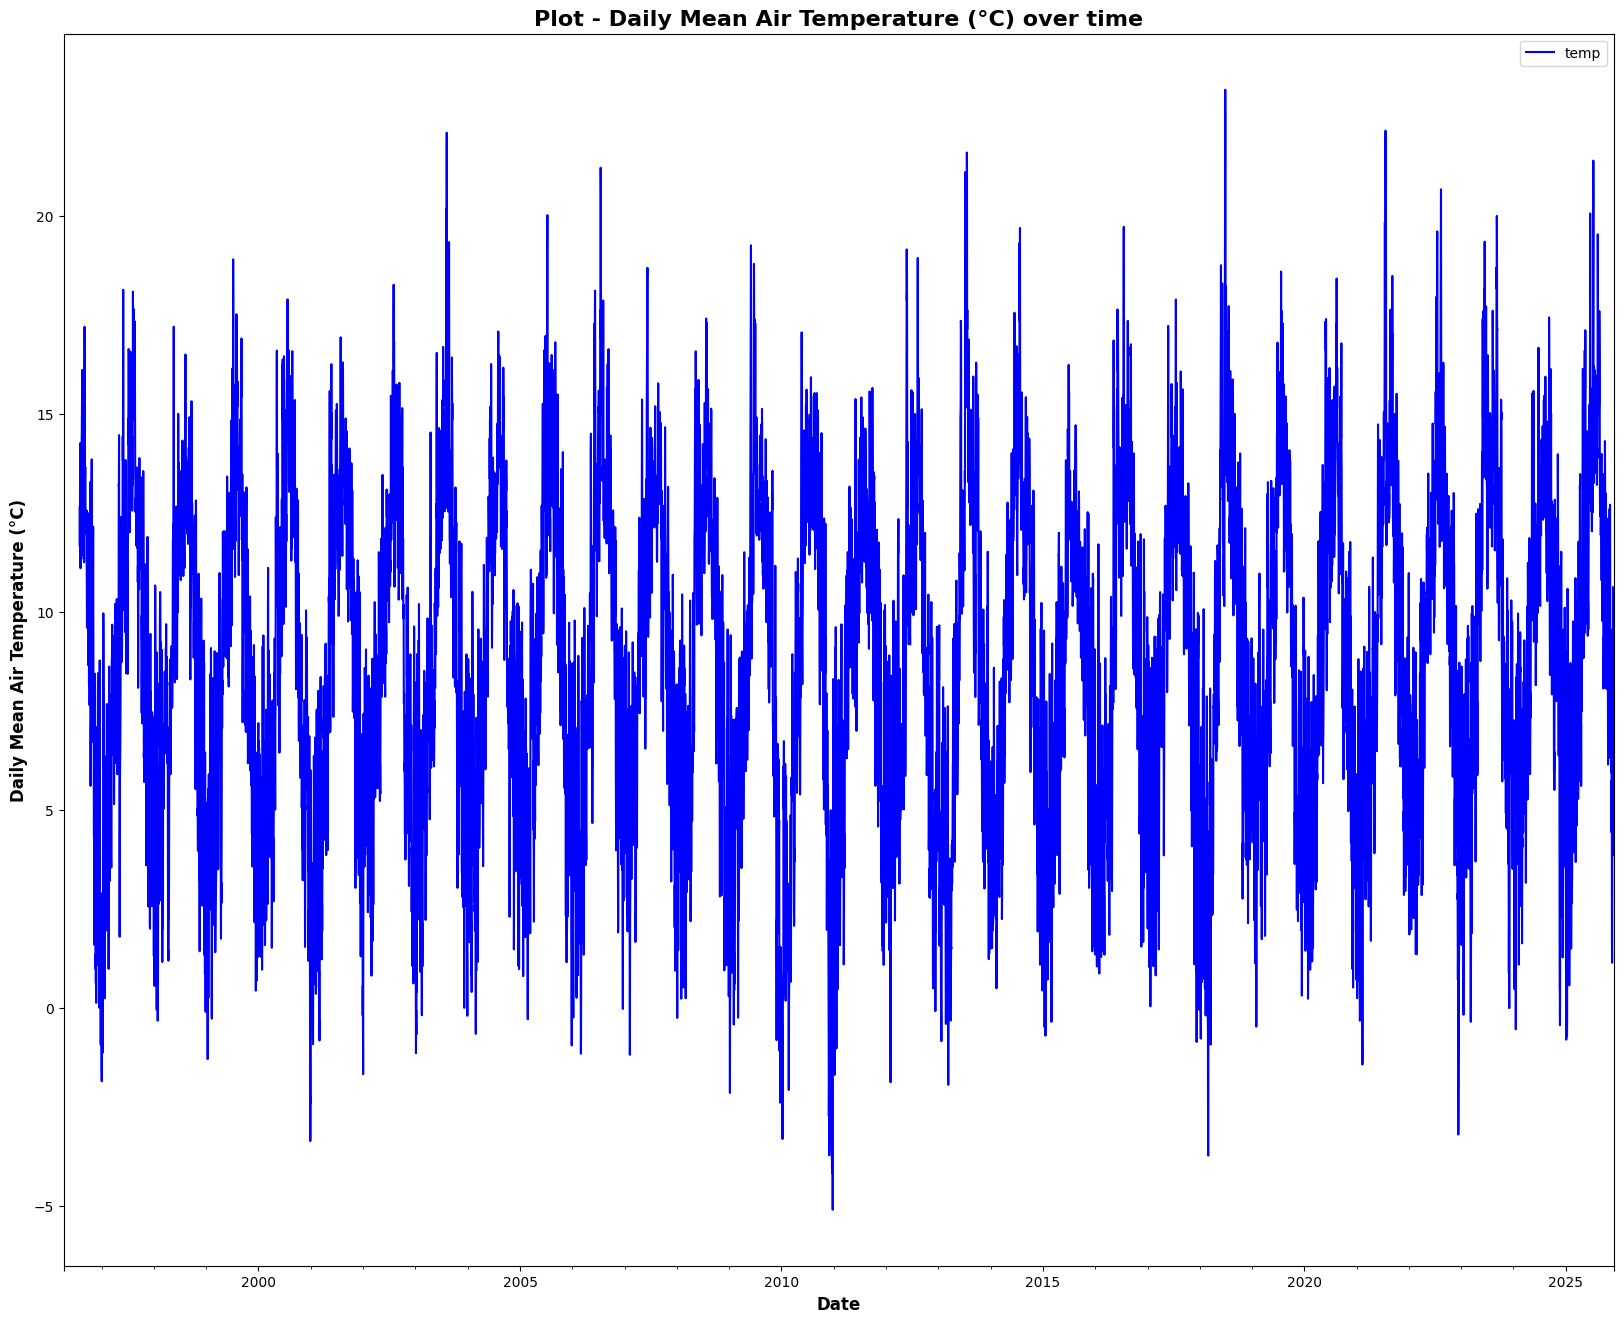

In [50]:
# PLOT 2: Mean temperature each day
temp_statsind = temp_stats.set_index('date') # I must indicate the date column as index that I can use resample later. Like in the lecture notebook
daily_tempmean = temp_statsind.resample('D').mean() # get the daily mean temperature requested
daily_tempmean = daily_tempmean.reset_index() # reset the index to get columns in line again (otherwise I wont be able to access column data later)
# display(daily_tempmean) # check if correct format now

# Take data and create new plot
dtemp_meanplot = daily_tempmean.plot.line(x='date', y='temp', figsize=(20,16), color='blue') # use as code as task above
dtemp_meanplot.set_title('Plot - Daily Mean Air Temperature (°C) over time', fontsize=16, weight='bold') # use as code as task abov
dtemp_meanplot.set_ylabel('Daily Mean Air Temperature (°C)', fontsize=12, weight='bold') # use as code as task abov
dtemp_meanplot.set_xlabel('Date', fontsize=12, weight='bold') # use as code as task abov

display(dtemp_meanplot) # Show plot


/tmp/ipykernel_13018/1529925330.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_tempmean = temp_statsind.resample('M').mean() # get the monthly mean temperature requested


<Axes: title={'center': 'Plot - Monthly Mean Air Temperature (°C) over time'}, xlabel='Date', ylabel='Monthly Mean Air Temperature (°C)'>

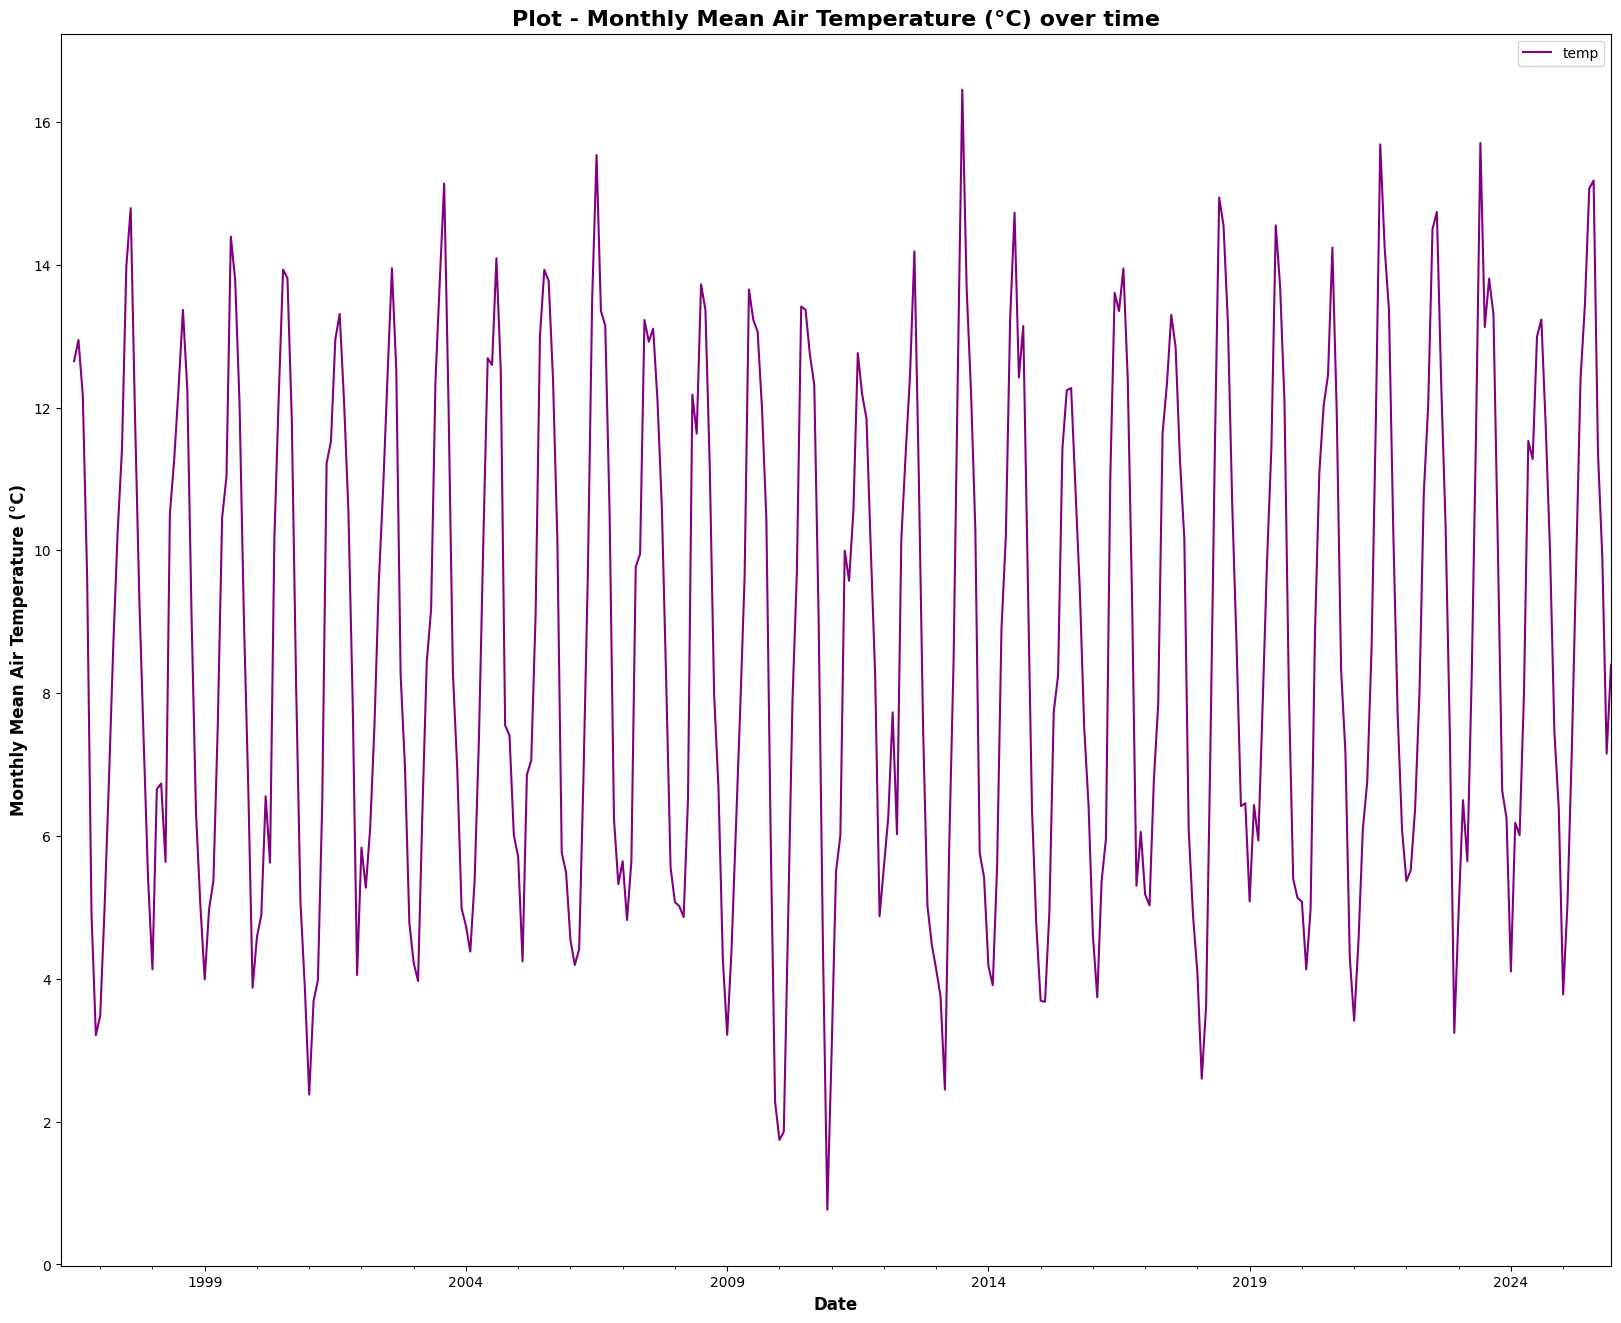

In [51]:
# PLOT 3: The mean temperature for each month
# Copy code above and adjust to month
monthly_tempmean = temp_statsind.resample('M').mean() # get the monthly mean temperature requested
monthly_tempmean = monthly_tempmean.reset_index() # reset the index to get columns in line again (otherwise I wont be able to access column data later)
# display(daily_tempmean) # check if correct format now

# Take data and create new plot
mtemp_meanplot = monthly_tempmean.plot.line(x='date', y='temp', figsize=(20,16), color='purple') # use as code as task above
mtemp_meanplot.set_title('Plot - Monthly Mean Air Temperature (°C) over time', fontsize=16, weight='bold') # use as code as task abov
mtemp_meanplot.set_ylabel('Monthly Mean Air Temperature (°C)', fontsize=12, weight='bold') # use as code as task abov
mtemp_meanplot.set_xlabel('Date', fontsize=12, weight='bold') # use as code as task abov

display(mtemp_meanplot) # Show plot

/tmp/ipykernel_13018/3180380425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winds['wdsp'] = pd.to_numeric(winds['wdsp'], errors='coerce') # use pd.to_numeric() function to


<Axes: title={'center': 'Plot - Wind Speed (km/h) over time'}, xlabel='Date', ylabel='Wind Speed (km/h)'>

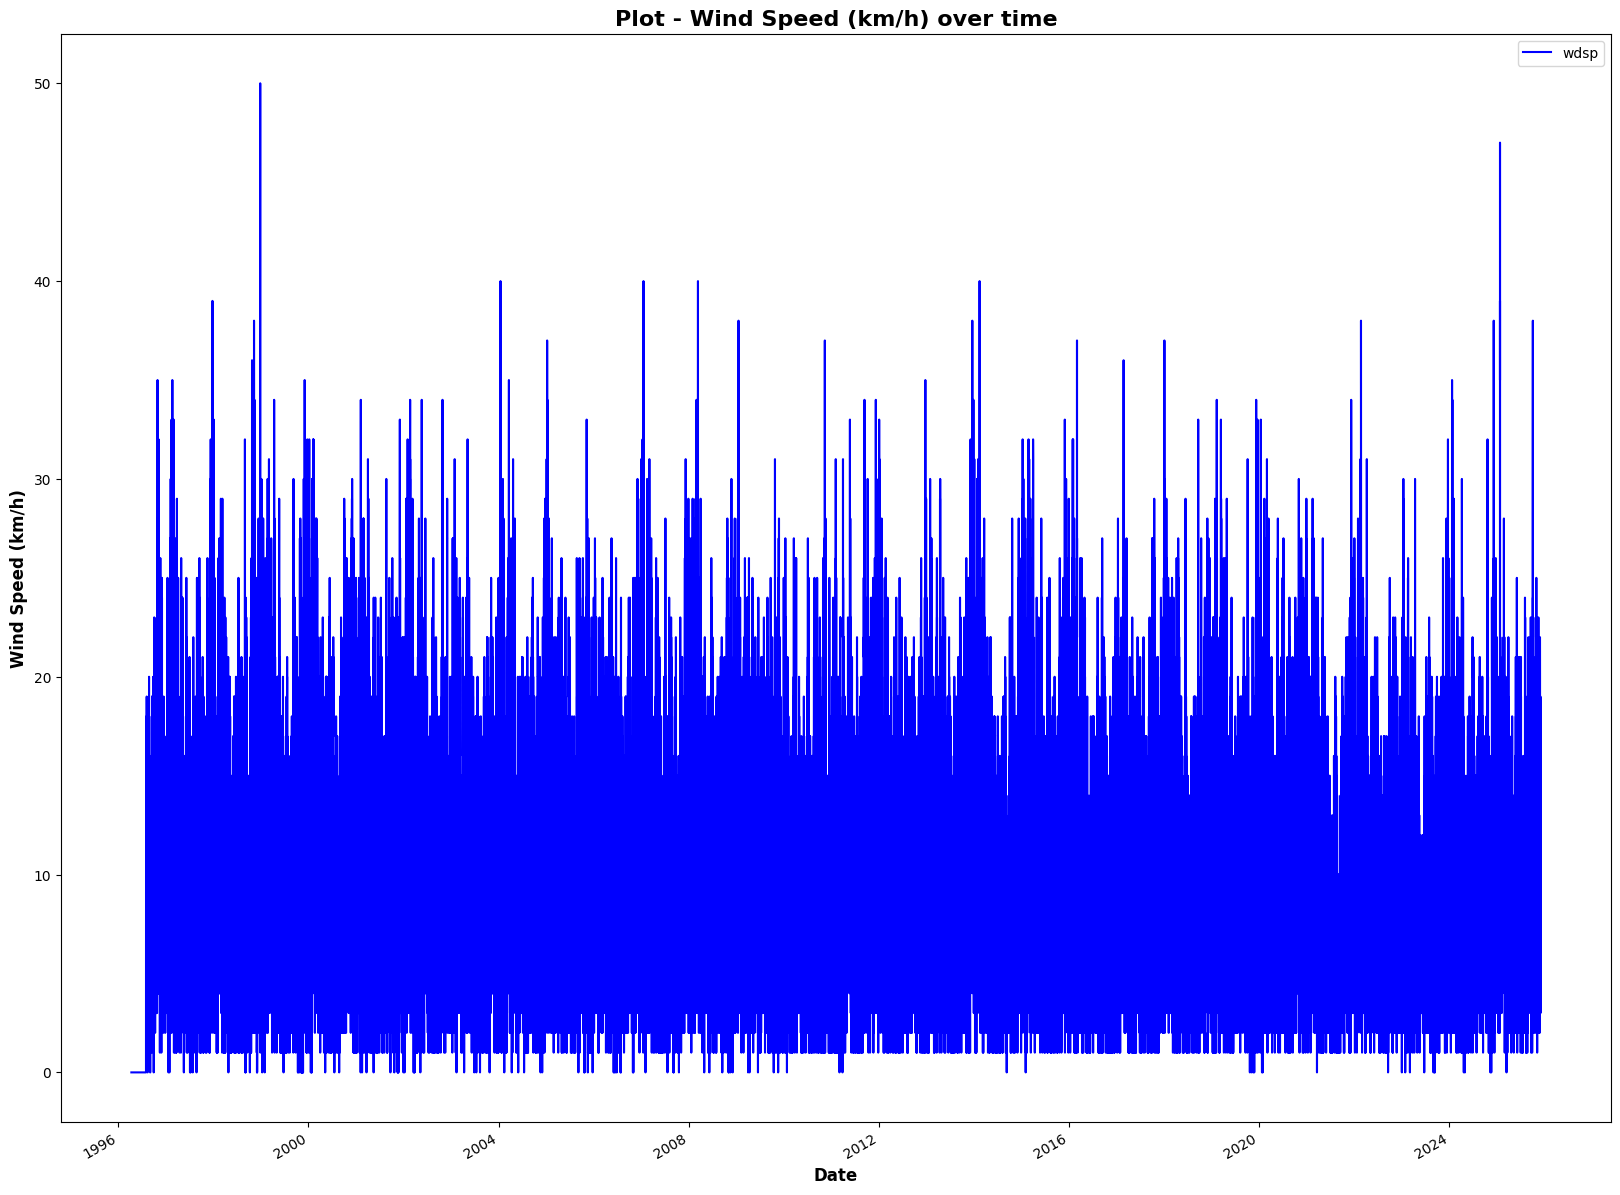

In [54]:
# PLOT 4: Windspeed (with missing data)
# Get new variable to store windspeed data and time
winds = weather_stats[['date','wdsp']]

winds['wdsp'] = pd.to_numeric(winds['wdsp'], errors='coerce') # use pd.to_numeric() function to 



winds_plot = winds.plot.line(x='date', y='wdsp', figsize=(20,16), color='blue')
winds_plot.set_title('Plot - Wind Speed (km/h) over time', fontsize=16, weight='bold')
winds_plot.set_ylabel('Wind Speed (km/h)', fontsize=12, weight='bold')
winds_plot.set_xlabel('Date', fontsize=12, weight='bold')

display(winds_plot)

## Task Resources
### The following resources were used for completion of this task:
1. Datetime resouces - The lecture notes in Topic 6. 
2. How to skip rows on CSA data not applicable - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
3. How to plot a line plot in pandas - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html
4. How to resample data to group by days or monts as required in this task - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling, Also lecture notes in Topic 6 (Timeseries in pandas)
5. How to use the datafram.resample() method for time series data - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
6. How to deal with missing data in your dataset (windspeed plot) - https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
